# Unit Tests
This script contains validation test for each of the python modules, including:
- Environment
- Robot
- Sensor
    - ground sensor
    - IR sensors
    - comm sensors
- Controller
    - ANN
- Actuator
    - comm output
    - wheel velocity
- Update location
    - wall collision
    - agent overlap
- Selection
    - 
- Visualization
    - 

trial:
- initialize environment
    - targets
    
- initialize agents (4 agents)
    - sensor, actuators
    - networks

for i in timesteps:  

        for a in agents:
                1. agent location and orientation - sensor readings
                2. sensor readings - network input
                3. network input - network output
                4. network output - actuator input
                5. actuator input - agent movement
                6. update agent location and orientation
                7. store all information for the current trials

animate trial:
- target
- position and location of the agent at every timestep

In [1]:
from Environment import environment
from Agent import agent
from Controller import controller

import random as rd
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *

# Environment

[[(80, 80), 35], [(190, 190), 35]]

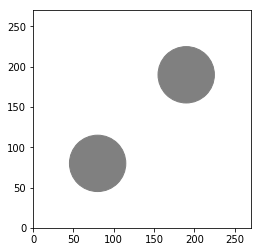

In [2]:
env = environment()
env.show()
env.targets

# Agents


            position: (7, 7),
            angle: 90
            


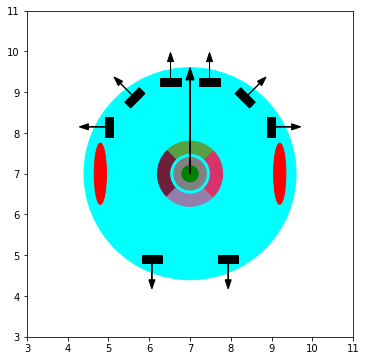

In [3]:
from Agent import agent
robot = agent((7, 7), 90, name='robot')
robot.show(verbose=True)

# Ground Sensor

robot1
pre: 0
post: 0 

robot2
pre: 0
post: 0 

robot3
pre: 0
post: 0 

robot4
pre: 0
post: 0 



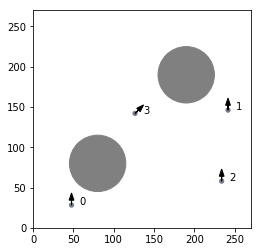

In [4]:
rob1 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 90, name='robot1')
rob2 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 90, name='robot2')
rob3 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 90, name='robot3')
rob4 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 45, name='robot4')

env.agents=[rob1, rob2, rob3, rob4]
env.show()

for a in env.agents:
    print(a.name)
    print('pre:', a.ground_reading)
    a.get_ground_reading(env)
    print('post:', a.ground_reading, '\n')

# IR Sensors

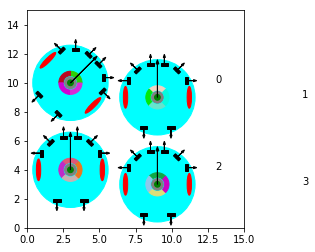

In [5]:
rob1 = agent((3, 10), 45, name='robot1')
rob2 = agent((9, 9), 90, name='robot2')
rob3 = agent((3, 4), 90, name='robot3')
rob4 = agent((9, 3), 90, name='robot4')

env.agents=[rob1, rob2, rob3, rob4]
env.show(15, 15, verbose=True)

In [6]:
for a in env.agents:
    print(a.name)
    print('ir readings, pre:', a.ir_readings)
    a.get_ir_readings(env)
    print('ir readings, post:', a.ir_readings)
    print('\n==============NEXT ROBOT================\n')

robot1
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.3198435483169847, 0, 0, 0, 0.6975497207051635, 0.6152291536303246, 0.3846039172768714, 0.7588016289066075]

==============NEXT ROBOT================

robot2
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.7175055798375369, 0, 0, 0, 0, 0, 0.7054051247446376, 0.7054051247446376]

==============NEXT ROBOT================

robot3
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.7983716857408418, 0.5338486453314001, 0.7610771455677097, 0.7610771455677111, 0.3729046905893013, 0.4907755160851106, 0.6202309105155964, 0.6202309105155964]

==============NEXT ROBOT================

robot4
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.7175055798375369, 0.1311987961110871, 0.7610771455677097, 0.7610771455677111, 0, 0, 0.8202309105155965, 0.8202309105155965]

==============NEXT ROBOT================



# Comm Sensors

robot1 0.3230019330891767
robot2 0.2480711278359783
robot3 0.5069422135785097
robot4 0.4408214049747551


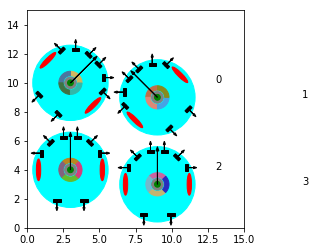

In [7]:
rob1 = agent((3, 10), 45, name='robot1')
rob2 = agent((9, 9), 135, name='robot2')
rob3 = agent((3, 4), 90, name='robot3')
rob4 = agent((9, 3), 90, name='robot4')

env.agents=[rob1, rob2, rob3, rob4]
env.show(15, 15, verbose=True)

for a in env.agents:
    a.comm_output = rd.uniform(0, 1)
    print(a.name, a.comm_output)

In [8]:
for a in env.agents:
    print(a.name)
    print('comm readings, pre:', a.comm_readings)
    a.get_comm_readings(env, verbose=True)
    print('comm readings, post:', a.comm_readings)
    print('\n==============NEXT ROBOT================\n')
    

robot1
comm readings, pre: [0, 0, 0, 0]
current agent: robot2
perceived signal: 0.2480711278359783
received by right sensor
current agent: robot3
perceived signal: 0.5069422135785097
received by right sensor
current agent: robot4
perceived signal: 0.4408214049747551
received by right sensor
comm readings, post: [0, 0, 0, 0.5069422135785097]

==============NEXT ROBOT================

robot2
comm readings, pre: [0, 0, 0, 0]
current agent: robot1
perceived signal: 0.3230019330891767
received by front sensor
current agent: robot3
perceived signal: 0.5069422135785097
received by left sensor
current agent: robot4
perceived signal: 0.4408214049747551
received by rear sensor
comm readings, post: [0.3230019330891767, 0.5069422135785097, 0.4408214049747551, 0]

==============NEXT ROBOT================

robot3
comm readings, pre: [0, 0, 0, 0]
current agent: robot1
perceived signal: 0.3230019330891767
received by front sensor
current agent: robot2
perceived signal: 0.2480711278359783
received by r

# Controller

In [9]:
from Controller import MN_controller
import random as rd
from Helper import normalize

In [10]:
genome = rd.choices(range(1, 255), k=83)
print(genome)
print([normalize(g) for g in genome])

[89, 82, 234, 140, 215, 104, 2, 41, 148, 54, 249, 158, 26, 225, 31, 102, 35, 136, 129, 193, 148, 35, 216, 35, 69, 62, 137, 212, 209, 126, 54, 3, 83, 88, 19, 60, 209, 138, 188, 24, 18, 60, 78, 190, 219, 191, 25, 41, 53, 133, 15, 207, 131, 91, 175, 209, 54, 83, 249, 190, 72, 242, 151, 22, 103, 88, 104, 156, 228, 178, 104, 219, 21, 201, 40, 116, 42, 187, 237, 109, 15, 206, 108]
[-1.5098039215686274, -1.784313725490196, 4.1764705882352935, 0.4901960784313726, 3.431372549019608, -0.9215686274509807, -4.921568627450981, -3.392156862745098, 0.8039215686274517, -2.8823529411764706, 4.76470588235294, 1.1960784313725492, -3.980392156862745, 3.8235294117647065, -3.784313725490196, -1.0, -3.627450980392157, 0.33333333333333304, 0.0588235294117645, 2.568627450980392, 0.8039215686274517, -3.627450980392157, 3.4705882352941178, -3.627450980392157, -2.294117647058824, -2.5686274509803924, 0.3725490196078427, 3.313725490196079, 3.1960784313725483, -0.0588235294117645, -2.8823529411764706, -4.8823529411

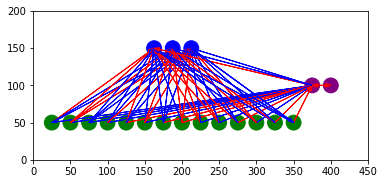

In [11]:
ann = MN_controller(genome)
ann.show()

In [12]:
ann.connections

{0: {'input': 0,
  'mode': 'sensor_to_internal',
  'output': 14,
  'weight': -3.627450980392157,
  'weight_locus': 21},
 1: {'input': 0,
  'mode': 'sensor_to_motor',
  'output': 16,
  'weight': 3.4705882352941178,
  'weight_locus': 22},
 2: {'input': 0,
  'mode': 'sensor_to_motor',
  'output': 17,
  'weight': -3.627450980392157,
  'weight_locus': 23},
 3: {'input': 0,
  'mode': 'sensor_to_motor',
  'output': 18,
  'weight': -2.294117647058824,
  'weight_locus': 24},
 4: {'input': 1,
  'mode': 'sensor_to_internal',
  'output': 14,
  'weight': -2.5686274509803924,
  'weight_locus': 25},
 5: {'input': 1,
  'mode': 'sensor_to_motor',
  'output': 16,
  'weight': 0.3725490196078427,
  'weight_locus': 26},
 6: {'input': 1,
  'mode': 'sensor_to_motor',
  'output': 17,
  'weight': 3.313725490196079,
  'weight_locus': 27},
 7: {'input': 1,
  'mode': 'sensor_to_motor',
  'output': 18,
  'weight': 3.1960784313725483,
  'weight_locus': 28},
 8: {'input': 2,
  'mode': 'sensor_to_internal',
  'output

# Get Outputs

robot1 0.27876084928278133
robot2 0.5900580854086529
robot3 0.1771167118002711
robot4 0.5493876577192711


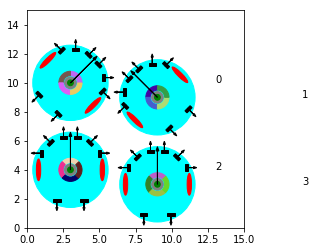

In [14]:
rob1 = agent((3, 10), 45, name='robot1')
rob2 = agent((9, 9), 135, name='robot2')
rob3 = agent((3, 4), 90, name='robot3')
rob4 = agent((9, 3), 90, name='robot4')

env.agents=[rob1, rob2, rob3, rob4]
env.show(15, 15, verbose=True)

for a in env.agents:
    a.comm_output = rd.uniform(0, 1)
    print(a.name, a.comm_output)

In [15]:
print('Pre: Ground: {}, IR:{}, Comm: {}, Comm_self:{}'.format(
    rob1.ground_reading, rob1.ir_readings, rob1.comm_readings, rob1.comm_self_reading))
rob1.comm_self_reading = rob1.comm_output
rob1.get_ground_reading(env)
rob1.get_ir_readings(env)
rob1.get_comm_readings(env)
print('Post: Ground: {}, IR:{}, Comm: {}, Comm_self:{}'.format(
    rob1.ground_reading, rob1.ir_readings, rob1.comm_readings, rob1.comm_self_reading))

Pre: Ground: 0, IR:[0, 0, 0, 0, 0, 0, 0, 0], Comm: [0, 0, 0, 0], Comm_self:0
Post: Ground: 0, IR:[0.3198435483169847, 0, 0, 0, 0.6975497207051635, 0.6152291536303246, 0.3846039172768714, 0.7588016289066075], Comm: [0, 0, 0, 0.5900580854086529], Comm_self:0.27876084928278133


In [16]:
print('Pre: wheel_left: {}, wheel_right:{}, comm_out: {}'.format(rob1.left_output, rob1.right_output, rob1.comm_output))
rob1.get_output()
print('Post: wheel_left: {}, wheel_right:{}, comm_out: {}'.format(rob1.left_output, rob1.right_output, rob1.comm_output))

Pre: wheel_left: 0, wheel_right:0, comm_out: 0.27876084928278133
Post: wheel_left: 0.21131776877781025, wheel_right:0.0837958992922646, comm_out: 0.3694528128287417


Still missing: actual update rules...

# Wheel to Movement

initial: x=100, y=100, ang=90

mode:  slow

final: x=100.48001009125879, y=147.6971149548771, ang=91.26072820291924


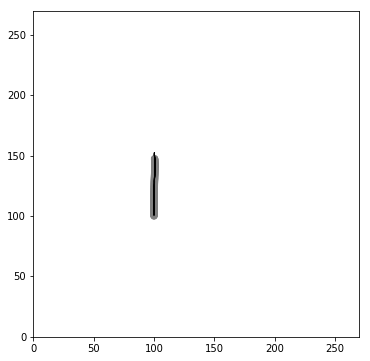

In [17]:
rob = agent((100, 100), 90, name='robot1')
print('initial: x={}, y={}, ang={}\n'.format(rob.loc[0], rob.loc[1], rob.ang))

loc = []
ang = []

mode = 'slow'
# mode = rd.choice(['straight', 'fast', 'slow', 'left', 'right'])

# go straight
if mode == 'straight':
    rob.left_output = 0.5
    rob.right_output = 0.5

# go faster
if mode == 'fast':
    rob.left_output = 0.8
    rob.right_output = 0.8

# go slower
if mode == 'slow':
    rob.left_output = 0.3
    rob.right_output = 0.3

# go left
if mode == 'left':
    rob.left_output = 0.4
    rob.right_output = 0.5

# go right
if mode == 'right':
    rob.left_output = 0.5
    rob.right_output = 0.4

for i in range(200):
    loc.append(rob.loc)
    ang.append(rob.ang)
    #rob.update_loc(verbose=True)    
    rob.update_loc(env=env)    

# plot out the agent in a 50 * 50 environment
ax = plt.axes(xlim=(0, 270), ylim=(0, 270))
line, = ax.plot([], [])

print('mode: ', mode)
for i in range(len(loc)):
    ax.add_patch(Circle(loc[-i], rob.r, color='gray'))
    ax.add_patch(FancyArrow(loc[-i][0], loc[-i][1],
                                find_dx(loc[-i][0], ang[-i], rob.r*2),
                                find_dy(loc[-i][1], ang[-i], rob.r*2),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))
        
print('\nfinal: x={}, y={}, ang={}'.format(rob.loc[0], rob.loc[1], rob.ang))
ax.set_aspect('equal')
ax.figure.set_size_inches(6, 6)

# Wall collision

* do not have agent collision as of now


final: x=2.6, y=199.47524567033048, ang=150.54706038056696


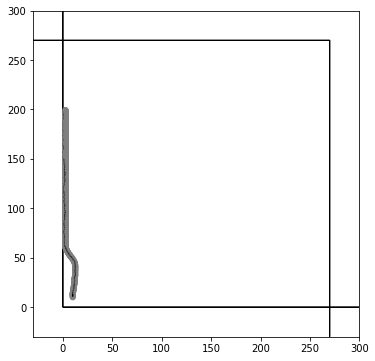

In [18]:
rob = agent((10, 10), 90, name='robot1')

loc = []
ang = []

# random
for i in range(1000):
    rob.left_output = rd.uniform(0, 1)
    rob.right_output = rd.uniform(0, 1)

    loc.append(rob.loc)
    ang.append(rob.ang)
    rob.update_loc(env=env, iteration_time=0.1)    
    #print('')

# plot out the agent in a 50 * 50 environment
ax = plt.axes(xlim=(-30, 300), ylim=(-30, 300))
line, = ax.plot([], [])

ax.add_patch(FancyArrow(0, 0, 300, 0, color='black'))
ax.add_patch(FancyArrow(0, 0, 0, 300, color='black'))
ax.add_patch(FancyArrow(270, 270, 0, -300, color='black'))
ax.add_patch(FancyArrow(270, 270, -300, 0, color='black'))


for i in range(len(loc)):
    ax.add_patch(Circle(loc[-i], rob.r, color='gray'))
    ax.add_patch(FancyArrow(loc[-i][0], loc[-i][1],
                                find_dx(loc[-i][0], ang[-i], rob.r),
                                find_dy(loc[-i][1], ang[-i], rob.r),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))
        
print('\nfinal: x={}, y={}, ang={}'.format(rob.loc[0], rob.loc[1], rob.ang))
ax.set_aspect('equal')
ax.figure.set_size_inches(6, 6)


# Trial

In [1]:
from Environment import environment
from Agent import agent
from Controller import MN_controller
from Trial import trial

import random as rd
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *

from tqdm import tqdm

 69%|██████▉   | 694/1000 [00:00<00:00, 1150.93it/s]

ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
ERROR: IR overlap w/ agent
E

100%|██████████| 1000/1000 [00:00<00:00, 1154.35it/s]


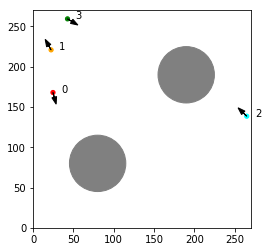

In [2]:
ann = MN_controller(random=True)
t = trial(ann, verbose=True)
t.run()  # should not run this more then once

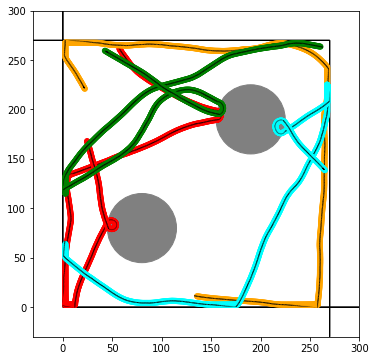

In [3]:
t.show()

In [5]:
t.fitness

68.75

In [6]:
t.step_fitness

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.

# Experiment

1. initial genome (100)
2. run 100 populations for gen 1 (given their genotypes)
3. select top 20 genome types
4. get gen 2 genotypes - induce variations via random selection
5. run 100 populations for gen 2 (given their genotypes)

In [1]:
from Environment import environment
from Agent import agent
from Controller import MN_controller
from Trial import trial
from Experiment import experiment

import random as rd
import pickle  
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *

from tqdm import tqdm

In [2]:
e = experiment(pop=10, gen=2, trial=3, include_top=2)

In [13]:
# this should return 1, e.pop, e.genome_size (default=83)
print(len(e.genome), len(e.genome[0]), len(e.genome[0][0]))

1 10 83


In [21]:
# just to check that the genomes are indeed randomly generated
# the three lists should have the same length
# the three lists should also contain very different numbers
print(len(e.genome[0][0]), e.genome[0][0])
print(len(e.genome[0][5]), e.genome[0][5])
print(len(e.genome[0][9]), e.genome[0][9])

83 [130, 176, 33, 82, 192, 197, 159, 220, 185, 234, 176, 106, 119, 229, 165, 21, 210, 105, 49, 154, 148, 180, 198, 115, 251, 27, 150, 132, 220, 98, 66, 98, 244, 199, 109, 106, 229, 165, 193, 194, 146, 141, 200, 179, 60, 211, 136, 197, 252, 99, 233, 250, 83, 56, 103, 235, 225, 139, 241, 197, 125, 192, 16, 222, 92, 121, 189, 121, 4, 124, 110, 116, 92, 175, 166, 207, 120, 48, 218, 219, 229, 176, 56]
83 [225, 109, 210, 217, 10, 218, 99, 90, 219, 15, 206, 52, 72, 146, 183, 64, 240, 41, 114, 126, 181, 112, 133, 13, 194, 11, 83, 139, 125, 111, 183, 203, 38, 38, 86, 25, 4, 248, 115, 246, 88, 231, 61, 205, 103, 43, 133, 51, 168, 49, 247, 144, 116, 149, 103, 243, 8, 6, 85, 177, 227, 253, 47, 191, 64, 233, 21, 109, 28, 101, 21, 63, 118, 178, 55, 179, 209, 129, 100, 185, 247, 61, 25]
83 [216, 112, 187, 122, 82, 121, 132, 96, 91, 47, 117, 23, 224, 141, 65, 112, 5, 90, 70, 238, 169, 4, 112, 100, 32, 88, 175, 181, 188, 100, 196, 97, 180, 133, 165, 31, 19, 13, 12, 223, 193, 116, 24, 51, 153, 40, 92, 2

In [3]:
e.get_gen_fitness(e.genome[0])

  0%|          | 0/10 [00:00<?, ?it/s]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0], [0, 0, 0]]


IndexError: list index out of range

In [30]:
def get_pop_fitness(ann):
    """Get the fitness of a genotype through behavioral trials."""
    t = trial(ann)
    t.run(record=False)
    return t.fitness

In [14]:
ann2 = MN_controller(e.genome[0][3])

In [15]:
ann2.nodes

{0: {'activation': [0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
 

In [16]:
t = trial(ann2)

In [17]:
%%time
t.run()

CPU times: user 764 ms, sys: 8.37 ms, total: 772 ms
Wall time: 820 ms


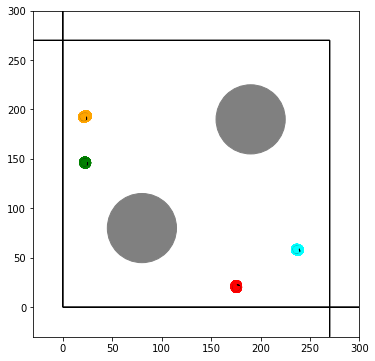

In [18]:
t.show()

In [32]:
get_pop_fitness(ann)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0], [0, 0, 0]]


IndexError: list index out of range

In [4]:
gen_fit = e.run()

  0%|          | 0/10 [00:00<?, ?it/s]

Current generation: 0


  0%|          | 0/10 [00:00<?, ?it/s]

Current generation: 1


100%|██████████| 10/10 [02:57<00:00, 17.75s/it]


In [6]:
len(e.top)

2

In [8]:
len(e.top[1])

2

In [10]:
len(e.top[0])

2

In [23]:
genome = e.top[1][0]

In [3]:
ann = MN_controller(genome)
t = trial(ann)

NameError: name 'genome' is not defined

In [29]:
t.run()

In [33]:
t.step_fitness

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

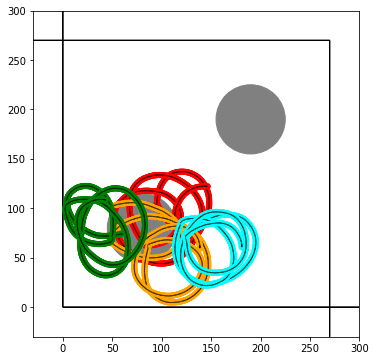

In [31]:
t.show()

In [36]:
pickle.dump(t, open('g2p10t3_swirling.trial', 'wb'))

[20,
 148,
 62,
 14,
 51,
 24,
 74,
 140,
 19,
 10,
 203,
 69,
 196,
 205,
 117,
 7,
 42,
 219,
 155,
 198,
 46,
 185,
 7,
 91,
 122,
 100,
 105,
 74,
 227,
 30,
 84,
 35,
 209,
 188,
 8,
 51,
 120,
 42,
 3,
 253,
 65,
 47,
 160,
 108,
 143,
 248,
 138,
 100,
 74,
 214,
 135,
 33,
 137,
 21,
 112,
 78,
 172,
 102,
 251,
 6,
 80,
 133,
 80,
 19,
 224,
 176,
 154,
 39,
 1,
 105,
 178,
 182,
 102,
 70,
 118,
 51,
 212,
 139,
 208,
 150,
 27,
 103,
 42]

In [27]:
import pickle  
file_fit = open('g0p60.fitness', 'wb') 
pickle.dump(gen_fit, file_fit)

In [4]:
gf_file = open('g0p601.fitness', 'rb')
gf = pickle.load(open('g0p60.fitness', 'rb'))

In [4]:
gf

[[[239,
   231,
   83,
   151,
   138,
   110,
   74,
   173,
   94,
   237,
   54,
   236,
   4,
   186,
   43,
   113,
   81,
   63,
   88,
   109,
   110,
   206,
   101,
   2,
   23,
   224,
   208,
   172,
   165,
   254,
   231,
   3,
   153,
   9,
   186,
   170,
   50,
   101,
   99,
   133,
   163,
   227,
   160,
   100,
   214,
   210,
   66,
   254,
   83,
   223,
   152,
   206,
   177,
   50,
   118,
   67,
   35,
   149,
   210,
   137,
   21,
   196,
   100,
   109,
   45,
   104,
   43,
   76,
   77,
   121,
   14,
   113,
   252,
   61,
   205,
   230,
   250,
   223,
   122,
   163,
   227,
   156,
   154],
  31.425],
 [[14,
   239,
   104,
   163,
   203,
   117,
   132,
   45,
   116,
   228,
   18,
   115,
   68,
   127,
   182,
   67,
   46,
   7,
   8,
   45,
   32,
   28,
   82,
   39,
   73,
   118,
   87,
   41,
   167,
   20,
   173,
   13,
   15,
   146,
   137,
   63,
   206,
   12,
   13,
   165,
   138,
   111,
   122,
   92,
   120,
   21,
   238,
   11

In [6]:
[g[1] for g in gf]
gen_fit = gf

In [7]:
top_genome = e.select_top(gen_fit, top=12)

In [12]:
print(top_genome)

[[175, 109, 167, 245, 140, 3, 164, 1, 60, 202, 192, 22, 223, 229, 28, 21, 183, 170, 230, 120, 2, 244, 156, 182, 218, 142, 122, 191, 195, 191, 39, 147, 99, 50, 209, 112, 242, 171, 175, 58, 223, 102, 244, 213, 150, 155, 210, 202, 47, 173, 22, 103, 191, 251, 136, 49, 252, 38, 45, 1, 176, 124, 244, 186, 105, 63, 198, 223, 214, 171, 164, 222, 113, 95, 57, 43, 91, 49, 150, 187, 167, 193, 230], [191, 200, 177, 175, 228, 224, 169, 95, 88, 44, 32, 119, 212, 37, 170, 4, 98, 54, 201, 67, 124, 116, 11, 176, 249, 171, 90, 121, 68, 226, 40, 71, 197, 114, 107, 160, 179, 212, 172, 127, 2, 182, 129, 30, 178, 12, 227, 42, 192, 222, 219, 51, 56, 113, 77, 146, 43, 54, 64, 58, 131, 232, 35, 46, 237, 197, 31, 249, 103, 224, 138, 223, 105, 178, 137, 219, 124, 47, 73, 203, 190, 81, 175], [231, 163, 31, 125, 0, 95, 40, 102, 208, 87, 218, 116, 173, 2, 78, 110, 93, 51, 153, 165, 117, 38, 162, 78, 176, 128, 51, 25, 48, 5, 204, 178, 81, 183, 149, 174, 124, 38, 248, 170, 121, 118, 183, 22, 5, 175, 0, 154, 150, 243,

In [8]:
next_gen = e.get_new_population(top_genome)

In [46]:
for i in range(len(next_gen)):
    if next_gen[29][i] != top_genome[5][i]:
        print(i)

39
48


In [10]:
len(next_gen)

60

In [23]:
index = [
    [1, 845],
    [2, 934],
    [3, 943],
    [4, 111],
    [5, 342],
    [6, 612],
    [7, 142],
    [8, 513]
]
def get_key(item):
    return item[1]

top_genome = [g[0] for g in sorted(index, key=get_key, reverse=True)[:5]]
top_genome

[3, 2, 1, 6, 8]

In [41]:
g = 2
p = 1
t = 3
'se'+'g{}p{}i{}'.format(g,p,i)

'seg2p1i3'

In [13]:
i = 1.00
i == int(i)

True

In [39]:
e = experiment(pop=100, gen=10)

In [40]:
e.run()

  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 0


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 1


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 2


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 3


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 4


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 5


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 6


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 7


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 8


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 9


100%|██████████| 100/100 [26:29<00:00, 15.89s/it]


In [49]:
pickle.dump(e, open('g10p100.exp', 'wb') )

In [1]:
import pickle
ex = pickle.load(open('g10p100.exp', 'rb'))

In [53]:
[rd.uniform(0, 1) for i in range(10)]

[0.46719942849150387,
 0.2196707885420388,
 0.2901412246469952,
 0.9693245172372327,
 0.08150790948393505,
 0.8681583835024198,
 0.011505061180118403,
 0.5693505679976616,
 0.568880114254511,
 0.7284948544376102]

In [37]:
sample_genome = ex.genome[10][48]

In [38]:
ann = MN_controller(sample_genome)
sample_t = trial(ann)

In [39]:
sample_t.run()

In [40]:
sample_t.fitness

181.25

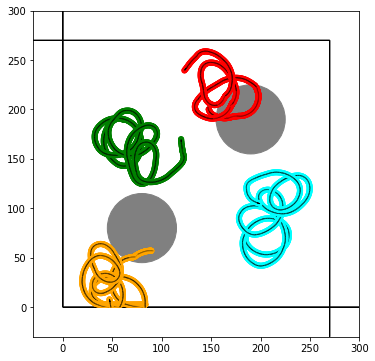

In [41]:
sample_t.show()

In [42]:
from Animate import animate

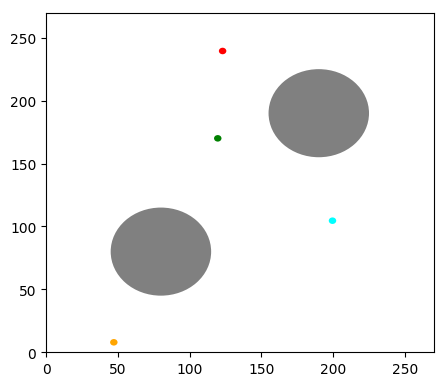

In [43]:
animate(sample_t, 'sample_trial_fit319.75')

In [75]:
def inc(x):
    for i in x:
        yield i + 1

l = [1, 2, 3]

In [67]:
def max_generator(numbers):
    current_max = 0
    for i in numbers:
        current_max = max(i, current_max)
        yield current_max
a = [3, 4, 6, 2, 1, 9, 0, 7, 5, 8]
results = list(max_generator(a))

In [76]:
list(inc(l))

[2, 3, 4]

In [77]:
e = experiment(pop=10, gen=3, trial=5, include_top=2)

In [ ]:
e.run()

  0%|          | 0/10 [00:00<?, ?it/s]

Current generation: 0


 40%|████      | 4/10 [01:02<01:33, 15.57s/it]

# MN controller

The network structure specified in Marocco & Nolfi (2007)



In [44]:
from Controller import MN_controller

### Initialize Network

In [50]:
import random as rd
from Helper import normalize

genome_size = 83
genome = rd.choices(range(0, 255), k=genome_size)

ann = MN_controller(genome)

In [51]:
print('genome:', genome)

print('nodes:')
for k, v in ann.nodes.items():
    print(k, v)
    
print('connections:')
for k, v in ann.connections.items():
    print(k, v)

genome: [181, 154, 115, 44, 35, 173, 98, 125, 56, 154, 188, 22, 10, 174, 241, 239, 50, 127, 39, 204, 64, 182, 219, 17, 101, 198, 27, 44, 57, 252, 3, 163, 163, 202, 191, 172, 104, 89, 64, 113, 189, 157, 31, 251, 228, 77, 75, 0, 52, 221, 159, 122, 40, 96, 164, 181, 41, 18, 141, 204, 188, 156, 59, 32, 135, 106, 185, 119, 92, 88, 218, 15, 0, 3, 211, 238, 52, 210, 41, 71, 138, 75, 153]
nodes:
0 {'type': 'sensory', 'name': 'IR_0', 'time_const_locus': 0, 'activation': [0], 'time_const': 0.7098039215686275}
1 {'type': 'sensory', 'name': 'IR_1', 'time_const_locus': 1, 'activation': [0], 'time_const': 0.6039215686274509}
2 {'type': 'sensory', 'name': 'IR_2', 'time_const_locus': 2, 'activation': [0], 'time_const': 0.45098039215686275}
3 {'type': 'sensory', 'name': 'IR_3', 'time_const_locus': 3, 'activation': [0], 'time_const': 0.17254901960784313}
4 {'type': 'sensory', 'name': 'IR_4', 'time_const_locus': 4, 'activation': [0], 'time_const': 0.13725490196078433}
5 {'type': 'sensory', 'name': 'IR_5'

### Propogate

In [62]:
inputs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
outputs = ann.sensor_to_motor(inputs)

for k, v in ann.nodes.items():
    print(k, v['activation'][-5:])  # last 5 digits
    
print(outputs)

14
lengths as predicted
0 [0.9092244767320378, 0.9355671776019562, 0.9542653299841336, 0.9675373518710909, 0.9769578850535978]
1 [0.970700258901112, 0.9823052543951813, 0.9893137614778742, 0.9935463500689907, 0.9961025016102925]
2 [0.9962059450249094, 0.998288955599469, 0.9992283525252508, 0.9996520021192308, 0.9998430597792609]
3 [0.9999954460582378, 0.9999992142218135, 0.9999998644147442, 0.999999976604897, 0.9999999959631979]
4 [0.9999990823120113, 0.9999998740428251, 0.9999999827117604, 0.9999999976271045, 0.9999999996743085]
5 [0.9338482315357133, 0.955120564924229, 0.9695523832623201, 0.9793433815858094, 0.9859859020170393]
6 [0.9987617701572076, 0.9995241312761034, 0.9998171171178751, 0.9999297155982423, 0.9999729887397166]
7 [0.9931987486045788, 0.9966660532375387, 0.9983657123713424, 0.9991988786134031, 0.9996072934379426]
8 [0.9999753660006286, 0.9999945901805303, 0.9999988119612144, 0.9999997390973647, 0.9999999427037349]
9 [0.970700258901112, 0.9823052543951813, 0.989313761

In [13]:
for k, v in ann.nodes.items():
    print(k, v['activation'])

0 [0, 0.36078431372549025]
1 [0, 0.40784313725490196]
2 [0, 0.9529411764705882]
3 [0, 0.43529411764705883]
4 [0, 0.8627450980392157]
5 [0, 0.9529411764705882]
6 [0, 0.39607843137254906]
7 [0, 0.9450980392156862]
8 [0, 0.2823529411764706]
9 [0, 0.8705882352941177]
10 [0, 0.7372549019607844]
11 [0, 0.6431372549019607]
12 [0, 0.6784313725490196]
13 [0, 0.0]
14 [0, 0, 7.556081505273872e-07]
15 [0, 0, 0.10883998994309205]
16 [0, 0, 0.00012693567005886528]
17 [0, 0, 0.004075283893085389]
18 [0, 0, 0.9918218509866622]


In [55]:
sensors = [
    0.7,
    0.5,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0.5,
    0,
    0,
    0,
    0
]
for n in nodes.keys():
    if n <= 12:
        nodes[n]['activation'].append(sensors[n])
    else:
        nodes[n]['activation'].append(0)


In [61]:
for k, v in nodes.items():
    print(k, v)
for k, v in connections.items():
    print(k, v)

0 {'type': 'sensory', 'name': 'IR_0', 'time_const_locus': 0, 'activation': [0.7], 'time_const': 0.803921568627451}
1 {'type': 'sensory', 'name': 'IR_1', 'time_const_locus': 1, 'activation': [0.5], 'time_const': 0.8666666666666667}
2 {'type': 'sensory', 'name': 'IR_2', 'time_const_locus': 2, 'activation': [0], 'time_const': 0.7254901960784313}
3 {'type': 'sensory', 'name': 'IR_3', 'time_const_locus': 3, 'activation': [0], 'time_const': 0.40784313725490196}
4 {'type': 'sensory', 'name': 'IR_4', 'time_const_locus': 4, 'activation': [0], 'time_const': 0.6627450980392157}
5 {'type': 'sensory', 'name': 'IR_5', 'time_const_locus': 5, 'activation': [0], 'time_const': 0.43529411764705883}
6 {'type': 'sensory', 'name': 'IR_6', 'time_const_locus': 6, 'activation': [0], 'time_const': 0.5137254901960784}
7 {'type': 'sensory', 'name': 'IR_7', 'time_const_locus': 7, 'activation': [0], 'time_const': 0.4235294117647059}
8 {'type': 'sensory', 'name': 'comm_0', 'time_const_locus': 8, 'activation': [0], '

order of computation:


sensor(t), i_1(t) -> motor (t+1)  
- sensor to motor
- internal to motor

sensor(t), i_2(t) -> i_1 (t+1)  
- sensor to internal
- internal to internal

i_1 (t) -> i_2 (t+1)  
- interal to internal

comm motor (t) -> comm self (t+1)
- motor to sensor

In [1]:
from Controller import MN_controller

In [2]:
import random as rd
genome_size = 83
genome = rd.choices(range(0, 255), k=genome_size)

In [3]:
ann = MN_controller(genome)

In [15]:
print(ann.genome)

[178, 199, 134, 51, 181, 13, 170, 154, 74, 24, 29, 33, 63, 17, 60, 61, 150, 62, 93, 19, 223, 124, 154, 221, 215, 207, 182, 158, 215, 173, 85, 7, 153, 152, 108, 88, 211, 8, 151, 176, 63, 138, 169, 143, 70, 209, 142, 137, 227, 236, 61, 4, 200, 107, 115, 202, 133, 118, 194, 3, 189, 236, 219, 41, 215, 124, 217, 77, 93, 50, 38, 21, 218, 167, 155, 169, 195, 48, 183, 111, 13, 141, 17]


In [34]:
inputs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ann.sensor_to_motor(inputs)

14
lengths as predicted


(0.9049148091662632, 0.7800127105992181, 0.9705599979992522)

In [54]:
import pickle  
file_t = open('RandomNetwork_Gen0.trial', 'wb') 
pickle.dump(t, file_t)

In [55]:
file_n = open('RandomNetwork_Gen0.trial', 'wb')
pickle.dump(ann, file_n)

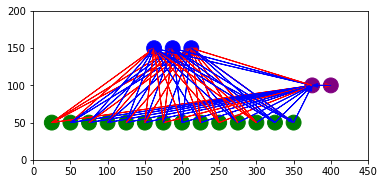

In [8]:
ann.show()

In [52]:
t.data[0][3][520:]


[[0.6249845133701865, 0.0002208131057028072, 0.9924180496519758],
 [0.6270024850903021, 0.0002162065220828293, 0.9924732656073422],
 [0.6271820975062884, 0.00021579981512862296, 0.9924781801797543],
 [0.6271979880467394, 0.0002157638601775789, 0.9924786150090227],
 [0.6271993932526291, 0.00021576068088523666, 0.9924786534616388],
 [0.6519973829452111, 0.00013048686435656137, 0.9942201554298252],
 [0.6522150086250281, 0.0001298825146685072, 0.9942382640954013],
 [0.6522170197045276, 0.00012987753081853797, 0.9942384318191949],
 [0.6529925810409958, 0.00012945821276030112, 0.9942571421709032],
 [0.6529888933575764, 0.00012947235855460324, 0.9942567032164903],
 [0.6529888497798657, 0.00012947244854736646, 0.9942567004144744],
 [0.6529888494935848, 0.00012947244907694522, 0.9942567003962156],
 [0.6529888494916927, 0.00012947244908052203, 0.994256700396071],
 [0.6529888494916781, 0.00012947244908055098, 0.9942567003960697],
 [0.6529888494916779, 0.00012947244908055098, 0.9942567003960697],


In [38]:
ann.nodes[14]['activation'], ann.nodes[15]['activation']

([0,
  0,
  2.2834427136193645e-05,
  2.0473043096771572e-05,
  1.7984275663552754e-05,
  1.579796078385478e-05,
  1.3878415462263825e-05,
  1.2192262228673237e-05,
  1.0710067117390844e-05,
  9.408059263795155e-06,
  8.264442187610329e-06,
  7.259980949830549e-06,
  6.377395447397486e-06,
  5.6021043587079595e-06,
  4.92112004493342e-06,
  4.3230130271284795e-06,
  3.7974705437920843e-06,
  3.3358173535228235e-06,
  2.9303312135136897e-06,
  2.574219244866007e-06,
  2.261275184573462e-06,
  1.9863751467533896e-06,
  1.7449353152977707e-06,
  1.5329229576156667e-06],
 [0,
  0,
  0.21294230530905406,
  0.3774510333221559,
  0.5045420527598913,
  0.6027260561200145,
  0.6785779773021234,
  0.7371772744836594,
  0.7824480775752847,
  0.8174219688297966,
  0.8444409937709396,
  0.8653144970294662,
  0.8814402857237514,
  0.8938982341011681,
  0.9035225977237006,
  0.9109578797037812,
  0.9167019901094559,
  0.9211395887135957,
  0.9245678439102953,
  0.9272163327297265,
  0.929262414574731

In [44]:
iw = [(ann.connections[c]['input'], ann.connections[c]['weight']) 
      for c in ann.connections.keys() if ann.connections[c]['output'] == 18]
a = [ann.nodes[i]['activation'][-1] for i, w in iw]

In [53]:
s = 0
for i in range(len(iw)):
    #print(iw[i][0], 'node')
    #print(iw[i][1], 'weight')
    #print(a[i], 'activation')
    print(iw[i][1] * a[i], 'sum')
    s += iw[i][1] * a[i]

-3.7450979968821296 sum
0.25450834869605465 sum
2.00113805442986 sum
2.6470588232327814 sum
3.3519799612111925 sum
-2.5294115739782086 sum
-2.725487910987107 sum
1.6273852459140206 sum
1.823529411758102 sum
4.68627279704 sum
-4.6470588235273445 sum
-3.8614907330019665 sum
2.882347562443624 sum
-0.3681975929329707 sum
3.576820234436555e-06 sum


1.3974791502361426

In [35]:
ann.nodes[16], ann.nodes[17], ann.nodes[18]

({'activation': [0,
   0,
   0.13835877392340734,
   0.2642613356547201,
   0.9989521887410415,
   0.9998199251311743,
   0.867128213591757,
   0.7693515683836163,
   0.9998571266313107,
   0.9999717931409895,
   0.9521086985005479,
   0.8642207231272246,
   0.9999295375664852,
   0.9999829883337567,
   0.9659317915211539,
   0.8908280147456477,
   0.9999456043048922,
   0.9999857767653926,
   0.9703624393088855,
   0.9007839281598474,
   0.9999509866751071,
   0.9999867820707605,
   0.9721318150287332,
   0.9049148091662632],
  'bias': -2.411764705882353,
  'bias_locus': 18,
  'name': 'motor_left',
  'type': 'motor'},
 {'activation': [0,
   0,
   0.4639993529111376,
   0.4701065802961628,
   0.9982131109633027,
   0.9994300708653885,
   0.7521384493401223,
   0.590517358994963,
   0.9992663068384069,
   0.9998259115776924,
   0.8673075237992354,
   0.7004064588483824,
   0.9996017026450926,
   0.9998906600467643,
   0.9021981310377813,
   0.7506932753680423,
   0.9996934800356091,
   

In [8]:
ann.nodes

{0: {'activation': [0,
   0.5607843137254902,
   0.8070895809304114,
   0.9152707178988473],
  'name': 'IR_0',
  'time_const': 0.4392156862745098,
  'time_const_locus': 0,
  'type': 'sensory'},
 1: {'activation': [0,
   0.5333333333333333,
   0.7822222222222222,
   0.8983703703703703],
  'name': 'IR_1',
  'time_const': 0.4666666666666667,
  'time_const_locus': 1,
  'type': 'sensory'},
 2: {'activation': [0,
   0.6196078431372549,
   0.8553018069973087,
   0.9449579422695644],
  'name': 'IR_2',
  'time_const': 0.3803921568627451,
  'time_const_locus': 2,
  'type': 'sensory'},
 3: {'activation': [0,
   0.5607843137254902,
   0.8070895809304114,
   0.9152707178988473],
  'name': 'IR_3',
  'time_const': 0.4392156862745098,
  'time_const_locus': 3,
  'type': 'sensory'},
 4: {'activation': [0,
   0.1568627450980392,
   0.289119569396386,
   0.40063022517734503],
  'name': 'IR_4',
  'time_const': 0.8431372549019608,
  'time_const_locus': 4,
  'type': 'sensory'},
 5: {'activation': [0,
   0.32

In [ ]:
class controller():
    """Generate a MN controller."""
    def __init__():
        pass
    
    def 
    
    def generate_node_list(i=14, h=2, o=3):
    """Generate list of nodes for MN controller."""
        node_count = i + h + o

        nodes = {}
        for n in range(i):
            if n <= 7:
                name = 'IR_' + str(n)
            elif n > 7 and n <= 11:
                name = 'comm_' + str(n-8)
            elif n == 12:
                name = 'ground'
            elif n == 13:
                name = 'comm_self'
            else:
                print('Error: unknown sensory neuron identity.')
            nodes[n] = {'type':'sensory', 'name': name, 'time_const_locus': n}


        for n in range(h):
            name = 'internal_' + str(n+1)
            nodes[n+i] = {'type':'internal', 'name': name, 'time_const_locus': n+i, 'bias_locus': n+i+h}

        for n in range(o):
            if n == 0:
                name = 'motor_left'
            elif n == 1:
                name = 'motor_right'
            elif n == 2:
                name = 'comm_unit'
            else:
                print('Error: unknown motor neuron identity.')
            nodes[n+i+h] = {'type':'motor', 'name': name, 'bias_locus': n+i+h*2}

        return nodes

    def generate_connection_list(i=14, h=2, o=3):
        """Generate list of all possible connections for MN controller."""
        offset = i+h*2+o

        connections = {}
        n = 0

        for i in nodes.keys():
            # sensory nodes
            if nodes[i]['type'] == 'sensory':
                for j in nodes.keys():
                    # sensor to internal
                    if nodes[j]['name'] == 'internal_1':
                        connections[n] = {'input': i, 'output': j, 'mode': 'sensor_to_internal', 'weight_locus': n+offset}
                        n += 1
                    # sensor to motor
                    if nodes[j]['type'] == 'motor':
                        connections[n] = {'input': i, 'output': j, 'mode': 'sensor_to_motor', 'weight_locus': n+offset}
                        n += 1

            # internal node 1
            if nodes[i]['name'] == 'internal_1':
                for j in nodes.keys():
                    # sensor to internal
                    if nodes[j]['name'] == 'internal_2':
                        connections[n] = {'input': i, 'output': j, 'mode': 'internal_to_internal', 'weight_locus': n+offset}
                        n += 1
                    # sensor to motor
                    if nodes[j]['type'] == 'motor':
                        connections[n] = {'input': i, 'output': j, 'mode': 'internal_to_motor', 'weight_locus': n+offset}
                        n += 1

            # internal node 2
            if nodes[i]['name'] == 'internal_2':
                for j in nodes.keys():
                    # sensor to internal
                    if nodes[j]['name'] == 'internal_1':
                        connections[n] = {'input': i, 'output': j, 'mode': 'internal_to_internal', 'weight_locus': n+offset}
                        n += 1
                        
            # comm unit to comm_self
            if nodes[i]['name'] == 'comm_unit':
                for j in nodes.keys():
                    if nodes[j]['name'] == 'comm_self':
                        connections[n] = {'input': i, 'output': j, 'mode': 'motor_to_sensor', 'weight_locus': n+offset}
                        n += 1
                        
        return connections


In [62]:
# initialize network parameters
class controller():
    """Generate a MN controller."""
    def __init__():
        """Initialize all the data needed for the network computation."""
        sensory_nodes = [
            ()
        ]
    


    
class MN_controller():
    """Generate a controller as described in Maracco & Nolfi (2003)."""
    def __init__(self, genome=[], random=False, genome_size=70):
        """
        Initialize network from genome.
        
        Two possible versions based on genome size:
        genome_size = 70:
        genome_size = 84: 
        
        Genome composition:
        0-13: input time constant 
        14-15:
        16-17:
        18-19:
        20:
        """
        
        # if want to generate random genome:
        if random:
            genome = rd.choices(range(0, 255), k=70)
        
        self.genome = genome  # this should be a list of 70 integers within range(0, 255)
        if len(genome) != 
        
        
        
        
        
        
        
        
    def randomize_genome(self):
        self.genome = rd.choices(range(0, 255), k=49)
        
        
        
    

input_tc = []
for i in range(14):
    tc = scale(rd.choice(range(0, 255)), out_min=0, out_max=1)
    input_tc.append(tc)

internal_tc = [
    scale(rd.choice(range(0, 255)), out_min=0, out_max=1),
    scale(rd.choice(range(0, 255)), out_min=0, out_max=1),
]

internal_bias = [
    scale(rd.choice(range(0, 255))),
    scale(rd.choice(range(0, 255))),
]

motor_bias = [
    scale(rd.choice(range(0, 255))),
    scale(rd.choice(range(0, 255))),
]

comm_bias = scale(rd.choice(range(0, 255)))

input_to_motor_weights = []
for i in len(motor_bias):
    




In [ ]:
# initialize activations
IR = [0, 0, 0, 0, 0, 0, 0, 0]
ground = [0]
comm = [0, 0, 0, 0]

comm_self = 0

i_1 = 0
i_2 = 0

motor = [0, 0]
comm_unit = 0

In [ ]:
# initialize data 
input_sensors = []
input_comm_self = []

internal_1 = []
internal_2 = []

output_motor = []
output_comm = []

In [ ]:
iteration = 10

# initialize
input_sensors.append(IR + ground + comm)
input_comm.append(comm_self)

internal_1.append(i_1)
internal_2.append(i_2)

output_motor.append(motor)
output_comm.append(comm_unit)

for t in range(1, iteration+1):  # output numbers: 1 ~ #iteration
    IR = [rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1)
         ]
    ground = [rd.uniform(0, 1)]
    comm = [rd.uniform(0, 1),
            rd.uniform(0, 1),
            rd.uniform(0, 1),
            rd.uniform(0, 1)
           ]

    print('t:', t+1)
    
    # update inputs
    inputs.append(IR + ground + comm)
    
    # update comm_self
    comm_activation = input_comm_self[t-1] * comm_tc * 
    
    
    comm_output = 
    input_comm = output_comm[t-1]
    
    # update internal neurons
    for 
    
    i_1 = 

    # update motor

    
    # update comm unit
    
    
    
    
    
    
    
    
    

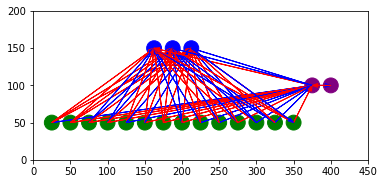

In [13]:
ann.show()

In [ ]:
class MnN_controller():
    class node()
    

# Animate Trial

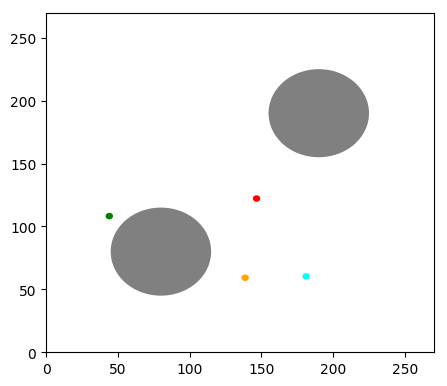

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 4.5)

ax = plt.axes(xlim=(0, 270), ylim=(0, 270))
agents = t.env.agents

target1 = plt.Circle((80, 80), 35, fc='gray')
target2 = plt.Circle((190, 190), 35, fc='gray')
a0 = plt.Circle(agents[0].loc_data[0], 2.6, fc='red')
a1 = plt.Circle(agents[1].loc_data[0], 2.6, fc='orange')
a2 = plt.Circle(agents[2].loc_data[0], 2.6, fc='cyan')
a3 = plt.Circle(agents[3].loc_data[0], 2.6, fc='green')

def init():
    a0.center = agents[0].loc_data[0]
    a1.center = agents[1].loc_data[0]
    a2.center = agents[2].loc_data[0]
    a3.center = agents[3].loc_data[0]
    
    ax.add_patch(target1)
    ax.add_patch(target2)
    ax.add_patch(a0)
    ax.add_patch(a1)
    ax.add_patch(a2)
    ax.add_patch(a3)
    
    return []


def animationManage(i, a0, a1, a2, a3):
    animate0(i, a0)
    animate1(i, a1)
    animate2(i, a2)
    animate3(i, a3)
    
    return []


def animate0(i, patch):
    patch.center = agents[0].loc_data[i]
    return patch,

def animate1(i, patch):
    patch.center = agents[1].loc_data[i]
    return patch,

def animate2(i, patch):
    patch.center = agents[2].loc_data[i]
    return patch,

def animate3(i, patch):
    patch.center = agents[3].loc_data[i]
    return patch,


anim = animation.FuncAnimation(fig, animationManage,
                               init_func=init,
                               frames=1000,
                               fargs=(a0, a1, a2, a3, ),
                               interval=20,
                               blit=True,
                               repeat=True)


plt.show()
anim.save('trial_1000.mp4', fps=100, extra_args=['-vcodec', 'libx264'])


In [24]:
iteration = 200

# initialize agent locations and ang

env.agents=[agent(name='robot0'), agent(name='robot1'), agent(name='robot2'), agent(name='robot3')]
env.show(verbose=True)

for agent in env.agents:
    agent.

for i in range(iteration):
    for agent in env.agents:
        pass
        

TypeError: 'agent' object is not callable

In [20]:
rob1 = agent(name='robot1')


agent loc and orientation - sensor readings:
- IR sensor  

    input:
    - agent location and orientation
    - environment (height & width)
    - location and r of other agents
    
    for each IR sensor:
    1. get IR loc and IR orientation from agent loc and agent orientation
    2. check for wall 
    3. check for other agents
    4. compare readings, take the greater among all
 

- Ground sensor
    
    input:
    - agent location and orientation
    - location and r of all targets (env.targets)
    
    for each ground sensor:
    1. get ground sensor location
    2. check if in each target area
    3. if yes, reading = 1; else reading = 0

- comm sensor
    input:
    - agent location and orientation
    - location an r of other agents
    
    1. get comm sensor loc and orientation
    2. check for the location of each other agent
    3. if an agent is within range, check that agent's comm unit output
    4. 

- IR sensor  

    input:
    - agent location and orientation
    - environment (height & width)
    - location and r of other agents
    
    for each IR sensor:
    1. get IR loc and IR orientation from agent loc and agent orientation
    2. check for wall 
    3. check for other agents
    4. compare readings, take the greater among all

In [15]:
def get_ir_loc(agent_loc, agent_ang, ir_placement):
    """Get location of IR sensor."""
    ang = norm_ang(ir_placement.ang+agent_ang)
    loc = find_loc(agent_loc, ang, ir_placement.distance)
    
    return loc, ang


def check_wall(environment, ir_loc, ir_ang):
    """
    Check reading due to wall.
    
    Logic:
    1. Find the maximum point within range of signal detection (range_max)
    2. See whether this point goes beyond the width and height of the environment.
    3. If it does, that means a wall is within range of detection.
    4. Calculate distance between IR sensor and the closest point to wall.
    5. IR sensor reading is the the ratio between this distance and the max range of detection.
    """
    range_max = find_loc(loc, ang, ir_range)
    if range_max[0] < 0 or range_max[0] > width:
        distance = loc[0]/abs(range_max[0]-loc[0])
    elif range_max[1] < 0 or range_max[0] > height:
        distance = loc[1]/abs(range_max[1]-loc[1])

    else:
        distance = 1

    reading = 1-distance
    
    return reading
    

def check_agent(agents):
    """
    Check reading due to other agents.
    
    Logic:
    1. 
    
    
    """
    


def get_ir_reading(loc, ang, ir_range, agents):
    """
    Get reading in response to obstacle, including wall and other agents.
    The closer the distance, the higher the reading.

    Method:
    - 1. check for wall (write this first)
        - find intersect with the wall it's facing
        - check if distance is less than ir_range
        - right now, linear scaling
    - 2. check for other agents
        - for each of the other agents, check if center is within range
        - if so, check distance
    """
    # check for wall
    tip = find_loc(loc, ang, ir_range)
    if tip[0] <= 0:
        distance = loc[0]/abs(tip[0]-loc[0])
    elif tip[1] <= 0:
        distance = loc[1]/abs(tip[1]-loc[1])

    else:
        distance = 1

    wall_reading = 1-distance

    # check for agent
    for a in agents:
        # distance = agents.loc[0]
        pass

    reading = wall_reading

    return reading

In [4]:
from Helper import find_ang, find_loc, get_distance

In [5]:
ir = ((10, 10), 90, 10)
tip = find_loc(ir[0], ir[1], ir[2])

In [6]:
c1 = ((20, 30), 6)
c2 = ((15, 8), 6)
c3 = ((13, 13), 6)

In [7]:
import math

In [8]:
# c1

a = get_distance(ir[0], c1[0])
b = get_distance(tip, c1[0])
c = get_distance(ir[0], tip)

In [9]:
print(a, b, c)

22.360679774997898 14.142135623730951 10.0


In [10]:
print(ir[0], tip, c1[0])

(10, 10) (10.0, 20.0) (20, 30)


In [14]:
math.sin(x)

0.5911271172152932

In [15]:
math.degrees(math.sin(x))

33.86908897217141

In [13]:
x = b/a

In [16]:
cos_a = (c**2 + b**2 - a**2) / (2 * b * c)
cos_b = (a**2 + c**2 - b**2) / (2 * a * c)
cos_c = (a**2 + b**2 - c**2) / (2 * a * b)


In [17]:
cos_c

0.9486832980505139

In [18]:
a_ang = math.degrees(math.acos(cos_a))
b_ang = math.degrees(math.acos(cos_b))
c_ang = math.degrees(math.acos(cos_c))

In [19]:
print(a_ang, b_ang, c_ang)

135.00000000000003 26.565051177077994 18.434948822922


In [20]:
def solve_triangle(loc_1, loc_2, loc_3):
    
    a = get_distance(loc_1, loc_2)  # between ir and tip
    b = get_distance(loc_1, loc_3)  # between ir and point
    c = get_distance(loc_2, loc_3)  # between tip and point

    cos_a = (c**2 + b**2 - a**2) / (2 * b * c)
    cos_b = (a**2 + c**2 - b**2) / (2 * a * c)
    cos_c = (a**2 + b**2 - c**2) / (2 * a * b)

    a_ang = math.degrees(math.acos(cos_a))  # ang at point
    b_ang = math.degrees(math.acos(cos_b))  # ang at tip
    c_ang = math.degrees(math.acos(cos_c))  # ang at ir

    return a_ang, b_ang, c_ang

In [21]:
solve_triangle(ir[0], tip, c3[0])
# a = ang at point
# b = ang at tip
# c = ang at ir

(111.80140948635182, 23.198590513648202, 45.0)

In [22]:
ang = 90
ir = (4, 1)
tip = find_loc(ir, 100, 2)
c = (4, 4)

In [23]:
a, b, c = solve_triangle(ir, tip, c)

In [24]:
print(a, b, c)

18.626651768632556 151.37334823136746 9.999999999999977


In [25]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle, FancyArrow, Wedge, Ellipse
from Helper import find_dx, find_dy, norm_ang, find_ang, get_distance, find_loc
import math

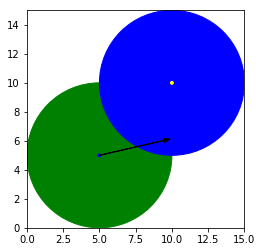

In [26]:
c1 = ((5, 5), 5)
ang = 13
c2 = ((10, 10), 5)

# overlap?
ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

Overlap
a:5, c:7.0710678118654755
angle 91 diff. 314.0


ValueError: math domain error

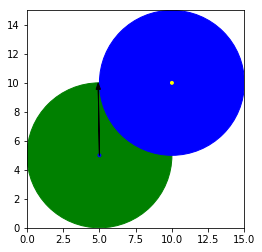

In [27]:
c1 = ((5, 5), 5)
ang = 91
c2 = ((10, 10), 5)

# overlap?
ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap?

distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')
    
# BC > R?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable')
    
# actual distance of detection
# assume it's the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = norm_ang(find_ang(5, 5, 10, 10) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
for b in possible_b:
    if b < c1[1]:
        print()
        print(b)

Overlap
detectable
a:5, c:5.0
angle 91 diff. 314.0

-1.7024593920297657e-15


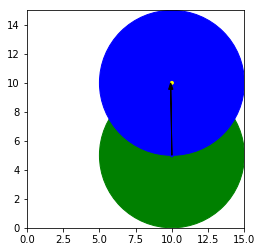

In [28]:
c1 = ((10, 5), 5)
ang = 91
c2 = ((10, 10), 5)

ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap?

distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')
    
# BC > R?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable')
    
# actual distance of detection
# assume it's the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = norm_ang(find_ang(5, 5, 10, 10) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
for b in possible_b:
    if b < c1[1]:
        print()
        print(b)

In [29]:
cases = [
    [((10, 10), 4), ((5, 5), 4)],
    [((10, 10), 4), ((5, 10), 4)],
    [((10, 10), 4), ((5, 15), 4)],
    [((10, 10), 4), ((10, 5), 4)],
    [((10, 10), 4), ((10, 15), 4)],
    [((10, 10), 4), ((15, 5), 4)],
    [((10, 10), 4), ((15, 10), 4)],
    [((10, 10), 4), ((15, 15), 4)],
]

Overlap
detectable, 2
a:4, c:5.0
angle 232 diff. 52
final 2.3883970165059374


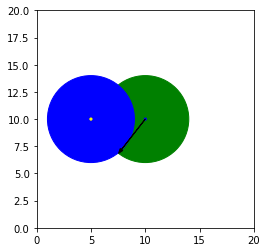

In [30]:
c = 1

c1 = cases[c][0]
c2 = cases[c][1]
ang = 232

ax = plt.axes(xlim=(0, 20), ylim=(0, 20))
line, = ax.plot([], [])

ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap - quadrant universal
distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')


# Detectable?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable, 1')
else:
    other_ang = find_ang(c1[0][0], c1[0][1], c2[0][0], c2[0][1])
    diff = abs(ang-other_ang)
    closest = distance * math.sin(math.radians(diff)) / math.sin(math.radians(90))
    if closest < c2[1]:
        print('detectable, 2')
        
# actual distance of detection
# among all possible answers, it's smaller than range and the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = abs(find_ang(c1[0][0], c1[0][1], c2[0][0], c2[0][1]) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
final_b = []
for b in possible_b:
    if b < c1[1]:
        final_b.append(b)
print('final', min(final_b))


In [31]:
# actual distance of detection
c = distance
a = c2[1]
A = find_ang(5, 5, 10, 10) - ang
b = c * math.cos(A) - math.sqrt(a**2 - c**2 * math.sin(A)**2)
print(b)

ValueError: math domain error

In [32]:
 b=ccosA+/-sqrt(a^2-c^2sin^2A). 

SyntaxError: invalid syntax (<ipython-input-32-004513fc177d>, line 1)

In [33]:
find_ang(5, 5, 10, 10) - ang

-187.0

In [127]:
c1[0]

(5, 5)

In [128]:
c2[0]

(10, 10)

In [ ]:
cases = [
    [((10, 10), 4), ((5, 5), 4)],
    [((10, 10), 4), ((5, 10), 4)],
    [((10, 10), 4), ((5, 15), 4)],
    [((10, 10), 4), ((10, 5), 4)],
    [((10, 10), 4), ((10, 15), 4)],
    [((10, 10), 4), ((15, 5), 4)],
    [((10, 10), 4), ((15, 10), 4)],
    [((10, 10), 4), ((15, 15), 4)],
]



In [ ]:
# ir sensor: loc, ang, range


def get_ir_reading(IR, environment, agents):
    pass


def check_wall(environment, ir_loc, ir_ang):
    """
    Check reading due to wall.

    Logic:
    1. Find the maximum point within range of signal detection (range_max)
    2. See whether this point goes beyond the width and height of the environment.
    3. If it does, that means a wall is within range of detection.
    4. Calculate distance between IR sensor and the closest point to wall.
    5. IR sensor reading is the the ratio between this distance and the max range of detection.
    """
    range_max = find_loc(loc, ang, ir_range)

    else:
        distance = 1

    reading = 1-distance

return reading



In [ ]:
Test_wall = [
    [(260, 260), 1]
]